In [75]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [19]:
tokens = tokenizer.encode('It was bad but couldve been better.', return_tensors='pt')

In [21]:
result = model(tokens)

In [23]:
result.logits

tensor([[ 0.2004,  1.5641,  1.8760, -0.4315, -2.6421]],
       grad_fn=<AddmmBackward0>)

In [17]:
int(torch.argmax(result.logits))+1

3

In [25]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')


In [27]:

soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [29]:
reviews

['Cooking food is like being a person, you must use real ingredients and select the best. Only careful cooking can make a delicious dish.',
 "Amazing ambience. Coffee was the best we've had in Sydney. The service and food also great. As must stop for breakfast.",
 "Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!",
 "Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking an

In [31]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [33]:
df['review'].iloc[0]

'Cooking food is like being a person, you must use real ingredients and select the best. Only careful cooking can make a delicious dish.'

In [35]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [37]:
sentiment_score(df['review'].iloc[1])

5

In [39]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [40]:
df

,review,sentiment
0,"Cooking food is like being a person, you must ...",4
1,Amazing ambience. Coffee was the best we've ha...,5
2,Very cute coffee shop and restaurant. They hav...,4
3,Six of us met here for breakfast before our wa...,4
4,We came for brunch and they ran out of seven s...,2
5,Ricotta hot cakes! These were so yummy. I ate ...,5
6,Great food amazing coffee and tea. Short walk ...,5
7,We came for brunch twice in our week-long visi...,4
8,Great place with delicious food and friendly s...,5
9,The food was delicious. The ricotta pancakes w...,4


In [47]:
df.to_csv(r"C:\NLP\sentiment_analysis_results.csv", index=False)

In [53]:
data = pd.read_csv(r"C:\NLP\sentiment_analysis_results.csv")

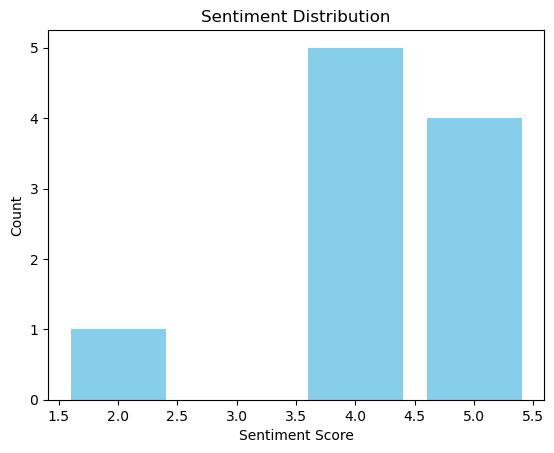

In [59]:
#sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [61]:
# Average Sentiment Score
average_sentiment = df['sentiment'].mean()
print(f'Average Sentiment Score: {average_sentiment:.2f}')

Average Sentiment Score: 4.20


In [63]:
# Positive vs Negative Reviews
positive_reviews = df[df['sentiment'] >= 4]
negative_reviews = df[df['sentiment'] <= 2]
print(f'Positive Reviews: {len(positive_reviews)}')
print(f'Negative Reviews: {len(negative_reviews)}')

Positive Reviews: 9
Negative Reviews: 1


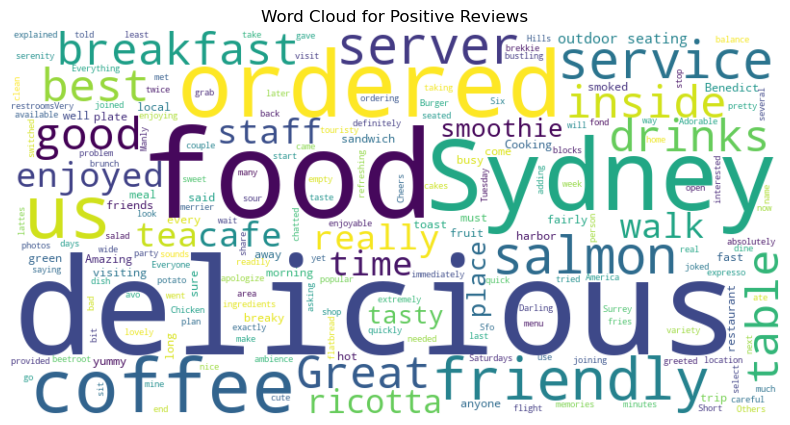

In [77]:
# Word Cloud for Positive Reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews['review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()